<hr>
<br>
<center>
  <img src="https://www.tecazuay.edu.ec/wp-content/uploads/2023/07/LOGO-RECTANGULAR_SIN-FONDO.png" height="110"/>

  <h2><b>TECNOLOGÍA SUPERIOR EN BIG DATA <br> <br> SISTEMA INTELIGENTE DE PREDICCIÓN DE INVENTARIOS CON BIG DATA PARA EL MERCADO DE CONSTRUCCIÓN</b></h2>

  <b>Integrantes:</b> Jimmy Sumba, Freddy Montalván, Eduardo Mendieta.

  <b>Docente:</b> Ing. Lady Sangacha.

  <b>Fecha:</b> 14/02/2025
</center>
<br><hr>


<p><b>Objetivo General: </b></p>

Predecir la demanda de productos de construcción para el análisis inteligente en las ventas y satisfacción de cliente que permita ampliar el negocio MQ distribuidora a través de herramientas tecnológicas.

<br>
<p><b>Objetivos Específicos: </b></p>

- Obtener una data set para el análisis inteligente en las ventas y satisfacción de cliente que permita ampliar el negocio MQ distribuidora.
- Modelar un algoritmo para la predicción de inventarios a través de modelos de machine learning con Python.
- Visualizar de forma interactiva el análisis inteligente de las ventas y satisfacción de cliente que permita ampliar el negocio MQ distribuidora.


Seleccionar adecuadamente las variables independientes y dependientes es esencial para asegurar la calidad y precisión del modelo. Una elección correcta mejora la captura de patrones relevantes, reduce el ruido y evita el sobreajuste, facilitando así la generalización a nuevos datos.


<br>
<p><b>Identificación de las variables necesarias para la predicción: </b></p>

- **Variables independientes:**

  - **nombreProducto:** Necesario para la predicción del stock por producto.

  - **cantidad:**  Indica el número total de unidades vendidas y es un fuerte predictor de la demanda. Una mayor cantidad vendida en meses anteriores generalmente se correlaciona con un mayor stock necesario en el futuro.

  - **mes:** Es necesaria puesto que se intenta predecir el stock mensual. Ademas, la estacionalidad es un factor clave en la demanda de productos. Algunos productos pueden venderse más en ciertos meses del año.

  - **anio:** Ayuda a identificar tendencias a largo plazo, esto enriquece el conjunto de datos y mejora la precisión de las predicciones del inventario necesario.


- **Variable dependiente:**

  - **stockMensual:** Cantidad total de productos disponibles en inventario al final de cada mes, que es lo que se desea predecir.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_excel('datosLimpios.xlsx', dtype={'rucCICli': str, 'telefono': str, 'climaPrecipitaciones': float, 'mes': int})

<hr>
<br>
<h2><b>4. MODELAR LOS DATOS</b></h2>

<br>
<p><b>Selección del modelo: </b></p>

Para lograr el objetivo de predecir el stock mensual por producto, hemos decidido seleccionar los siguientes modelos de aprendizaje supervisado. Esto nos permitirá obtener diferentes resultados y realizar comparaciones entre ellos, buscando así la mejor opción para alcanzar el resultado esperado o deseado.

- **Regresión Lineal:** Permite predecir una variable continua a partir de variables independientes, siendo útil para identificar relaciones lineales que afectan la demanda, como precio y estacionalidad. Su simplicidad y facilidad de interpretación ayudan a los gestores a comprender rápidamente cómo influyen los cambios en las variables en la cantidad de productos necesarios.

- **Árboles de Decisión:** Los árboles de decisión dividen los datos en subconjuntos basándose en características específicas, lo que facilita la interpretación de decisiones. Son ideales para analizar factores como promociones y tipos de productos, y su capacidad para visualizar decisiones ayuda a identificar patrones complejos en la demanda, optimizando así la disponibilidad de productos.

- **Random Forest:** Combina múltiples árboles de decisión para mejorar la precisión de las predicciones. Su capacidad para manejar grandes conjuntos de datos y múltiples variables reduce el riesgo de sobreajuste. Al combinar predicciones, ofrece estimaciones más robustas, esenciales para mantener niveles óptimos de stock y satisfacer la demanda del mercado.

In [ ]:
def obtener_prediccion(model, X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    res = X_test.copy()

    res['y_test'] = y_test
    res['y_pred'] = y_pred

    return res, y

<br>

<b><u>PREDECIR LA DEMANDA DE PRODUCTOS:</b></u>

In [ ]:
x_stock = df[['nombreProducto', 'mes', 'anio']]
y_stock = df['stockMensual']

preprocessor_stock = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['nombreProducto']),
        ('num', 'passthrough', ['mes', 'anio'])
])

- **Mediante el modelo de Regresión Lineal:**

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor_stock),
    ('regressor', LinearRegression())
])

pred_stock_rlineal = obtener_prediccion(model, x_stock, y_stock, 0.2)

pred_stock_rlineal[0].head()

,nombreProducto,mes,anio,y_test,y_pred
288,LADRILLO PISO,10,2017,160,-1656.137101
9,TOCHANO 10X40,12,2024,15000,10659.154186
57,TOCHANO 10X40,6,2024,12000,14085.504005
60,PANELON,5,2024,12000,13779.502771
25,LADRILLO PISO,9,2024,80,74.775312


- **Mediante el modelo de Arboles de Decisión:**

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor_stock),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

pred_stock_ardecision = obtener_prediccion(model, x_stock, y_stock, 0.15)

pred_stock_ardecision[0].head()

,nombreProducto,mes,anio,y_test,y_pred
288,LADRILLO PISO,10,2017,160,160.0
9,TOCHANO 10X40,12,2024,15000,15000.0
57,TOCHANO 10X40,6,2024,12000,12000.0
60,PANELON,5,2024,12000,12000.0
25,LADRILLO PISO,9,2024,80,70.0


- **Mediante el modelo Random Forest:**

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor_stock),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pred_stock_rforest = obtener_prediccion(model, x_stock, y_stock, 0.15)

pred_stock_rforest[0].head()

,nombreProducto,mes,anio,y_test,y_pred
288,LADRILLO PISO,10,2017,160,1551.9
9,TOCHANO 10X40,12,2024,15000,14330.0
57,TOCHANO 10X40,6,2024,12000,12350.0
60,PANELON,5,2024,12000,12290.0
25,LADRILLO PISO,9,2024,80,2802.1


<hr>
<br>
<h2><b>5. EVALUAR EL MODELO</b></h2>

In [ ]:
def evaluar_modelo(model_pred_res):
    mse = mean_squared_error(model_pred_res[0].y_test, model_pred_res[0].y_pred)
    mae = mean_absolute_error(model_pred_res[0].y_test, model_pred_res[0].y_pred)
    r2 = r2_score(model_pred_res[0].y_test, model_pred_res[0].y_pred)

    print(f'Error Absoluto Medio (MAE): {mae}')
    print(f'Error Cuadrático Medio (MSE): {mse}')
    print(f'R² Score: {r2}')

In [ ]:
def graficar_pred_vs_reales(model_pred_res, lbl_modelo):
    pred = model_pred_res[0]
    y = model_pred_res[1]

    plt.figure(figsize=(10, 6))
    plt.scatter(pred.y_test, pred.y_pred, color='blue', label='Predicciones')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de referencia')
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title(f'Predicciones vs. Valores Reales en el modelo {lbl_modelo}')
    plt.legend()
    plt.show()

In [ ]:
def graficar_distrib_err(model_pred_res):
    pred = model_pred_res[0]

    errors = pred.y_test - pred.y_pred

    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True)
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Errores')
    plt.show()

<br>

<b><u>EVALUACIÓN DE LA PREDICCIÓN DE DEMANDA DE PRODUCTOS:</b></u>

<br>

<b>Evaluación a través de métricas:</b>

In [ ]:
print('\n---------- Evaluación de modelo de Regresión Lineal:\n')
evaluar_modelo(pred_stock_rlineal)

print('\n---------- Evaluación de modelo de Arboles de Decisión:\n')
evaluar_modelo(pred_stock_ardecision)

print('\n---------- Evaluación de modelo Random Forest:\n')
evaluar_modelo(pred_stock_rforest)


---------- Evaluación de modelo de Regresión Lineal:

Error Absoluto Medio (MAE): 2010.0835424309366
Error Cuadrático Medio (MSE): 6578162.202493794
R² Score: 0.8100977319877652

---------- Evaluación de modelo de Arboles de Decisión:

Error Absoluto Medio (MAE): 687.8723404255319
Error Cuadrático Medio (MSE): 4264904.255319149
R² Score: 0.8686618225049902

---------- Evaluación de modelo Random Forest:

Error Absoluto Medio (MAE): 913.791489361702
Error Cuadrático Medio (MSE): 3675998.3672340424
R² Score: 0.8867972415969225


<br>

<b>Evaluación a través de visualización de Predicciones vs. Valores Reales:</b>

<br>

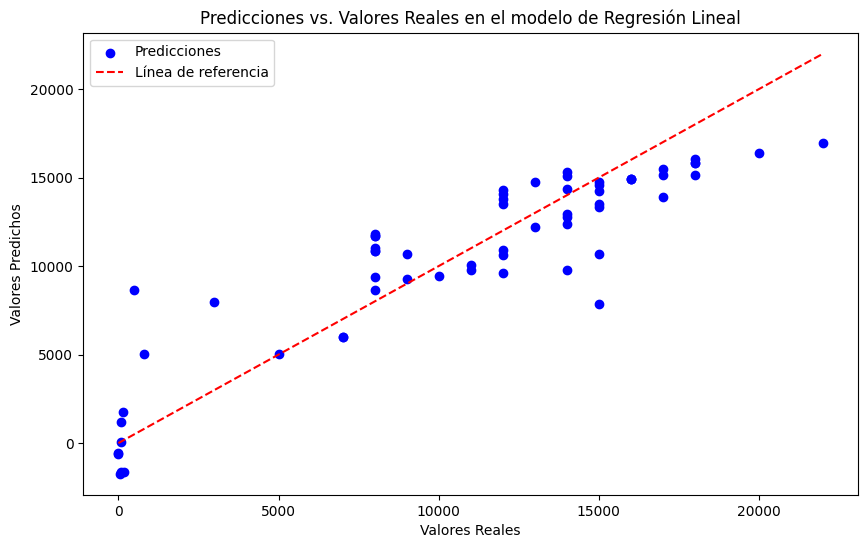

In [ ]:
graficar_pred_vs_reales(pred_stock_rlineal, 'de Regresión Lineal')

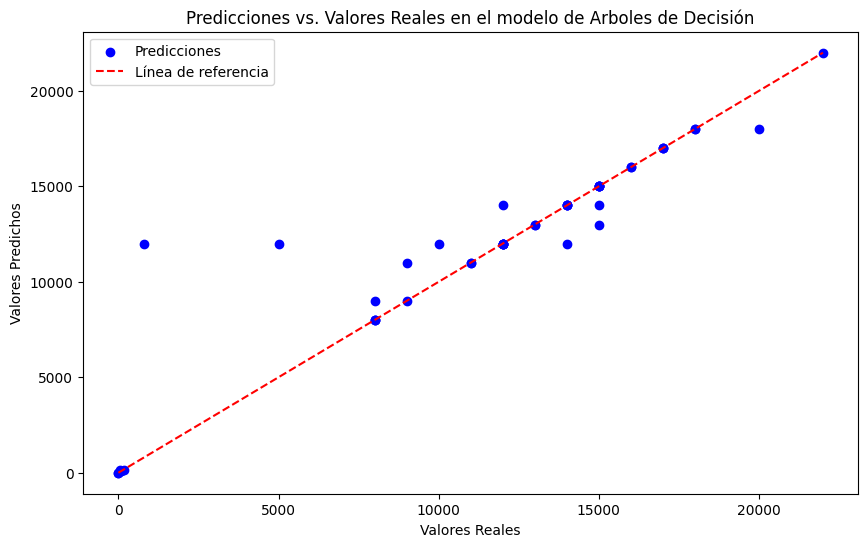

In [ ]:
graficar_pred_vs_reales(pred_stock_ardecision, 'de Arboles de Decisión')

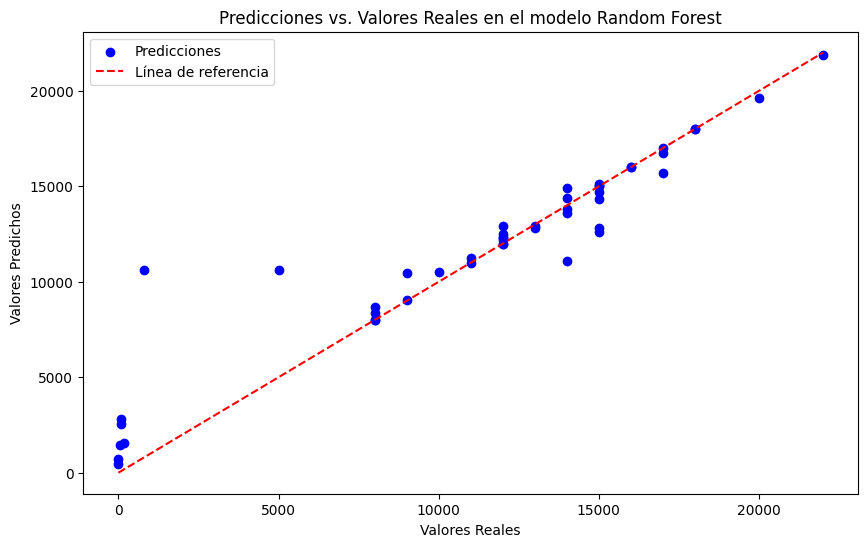

In [ ]:
graficar_pred_vs_reales(pred_stock_rforest, 'Random Forest')

<br>

<b>Evaluación a través de Distribución de Errores:</b>

<br>

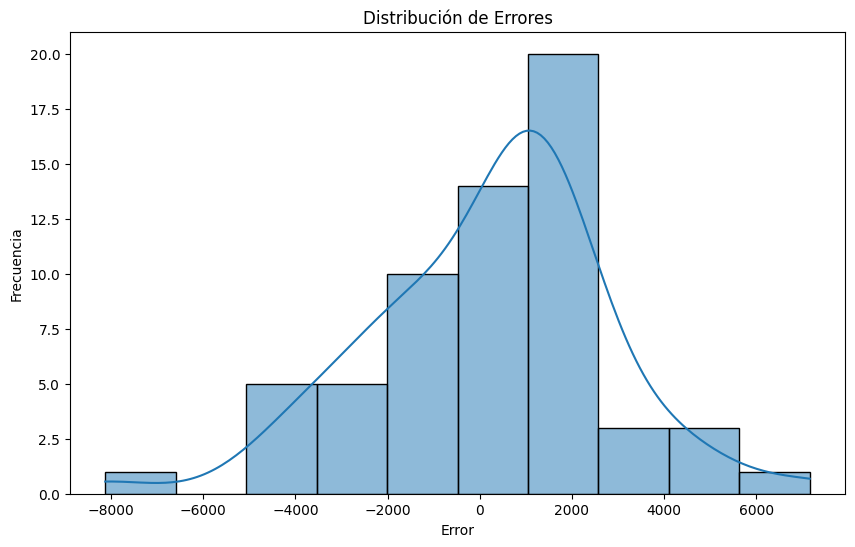

In [ ]:
graficar_distrib_err(pred_stock_rlineal)

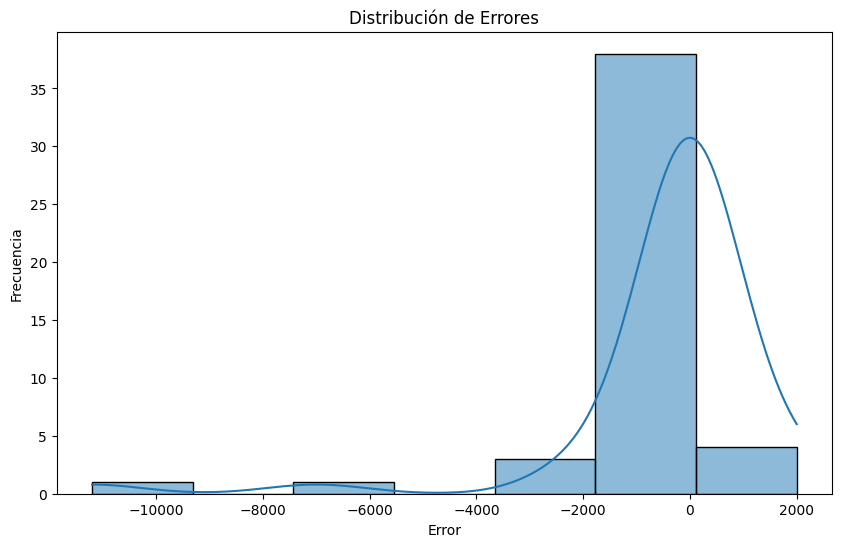

In [ ]:
graficar_distrib_err(pred_stock_ardecision)

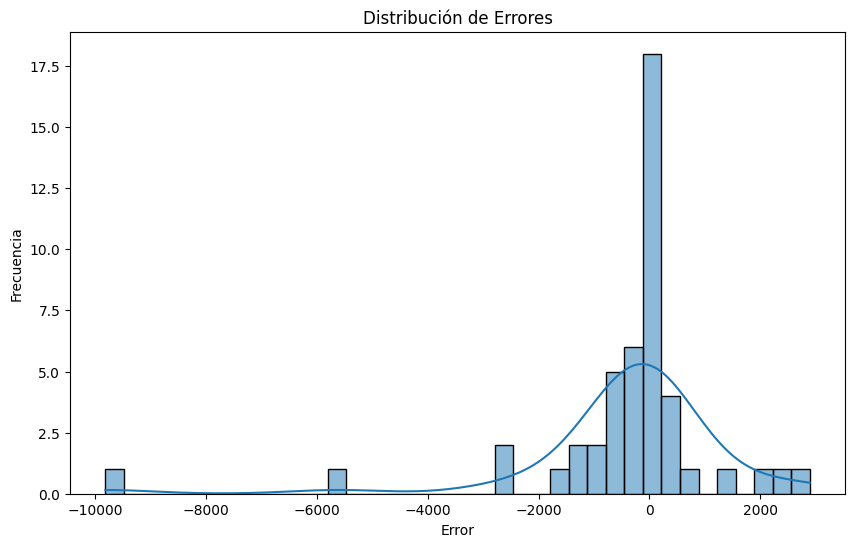

In [ ]:
graficar_distrib_err(pred_stock_rforest)

<hr>
<br>
<h2><b>EXPORTANDO LOS RESULTADOS</b></h2>

In [ ]:
def exportar_excel(ruta, df):
    df.to_excel(ruta, engine='openpyxl', index=False)
    print(f'DataFrame guardado exitosamente en {ruta}!')

In [ ]:
exportar_excel('pred_stock_rlineal.xlsx', pred_stock_rlineal[0])
exportar_excel('pred_stock_ardecision.xlsx', pred_stock_ardecision[0])
exportar_excel('pred_stock_rforest.xlsx', pred_stock_rforest[0])

DataFrame guardado exitosamente en pred_stock_rlineal.xlsx!
DataFrame guardado exitosamente en pred_stock_ardecision.xlsx!
DataFrame guardado exitosamente en pred_stock_rforest.xlsx!
